In [ ]:

# Specify the file path
file_path = '/content/Stimuli_information_expanded.csv'  # Update with your actual file path

try:
  # Read the CSV file into a pandas DataFrame
  df = pd.read_csv(file_path)

  # Now you can start analyzing the data
  print(df.head(3)) # Display the first few rows of the DataFrame

  # Example analysis: calculate the mean of a column (replace 'column_name' with your actual column)
  # if 'column_name' in df.columns:
  #   mean_value = df['column_name'].mean()
  #   print(f"The mean of 'column_name' is: {mean_value}")
  # else:
  #   print(f"'column_name' not found in the DataFrame")


except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

An error occurred: name 'pd' is not defined


In [ ]:
# Asegurar que sea numérica (esto puede ir al inicio de tu notebook)
df['Distancia Intracortical'] = pd.to_numeric(df['Distancia Intracortical'].astype(str).str.replace(",", "."), errors='coerce')

# ==============================================
# ANÁLISIS POR ENSAYO USANDO EL ARCHIVO EXPANDIDO
# ==============================================

# 2. Limpieza: asegurarte de que los datos estén en formato numérico
df['Start frame (lateral)'] = pd.to_numeric(
    df['Start frame (lateral)'].astype(str).str.strip(), errors='coerce'
)

# 3. Estadísticas clave
print(f"\n🔬 Total de ensayos válidos: {len(df):,}")
print(f"📈 Ensayos por condición:")
print(df.groupby(['Forma del Pulso', 'Duración (ms)']).size().unstack().fillna(0))

# ==============================================
# VISUALIZACIONES POR ENSAYO
# ==============================================

plt.figure(figsize=(18, 10))

# Gráfico 1: Distribución de Movimiento por Duración y Forma de Pulso
plt.subplot(2, 2, 1)
sns.boxplot(
    x='Duración (ms)',
    y='Movimiento evocado',
    hue='Forma del Pulso',
    data=df,
    showfliers=False,
    palette='viridis'
)
plt.title('Distribución de Movimiento Evocado\npor Duración y Forma de Pulso')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico 2: Densidad de Movimiento vs Distancia Intracortical
plt.subplot(2, 2, 2)
sns.kdeplot(
    x='Distancia Intracortical',
    y='Movimiento evocado',
    hue='Forma del Pulso',
    data=df,
    fill=True,
    alpha=0.3,
    palette='rocket'
)
plt.title('Densidad de Movimiento vs Distancia Intracortical')

# Gráfico 3: Conteo de Ensayos por Combinación Experimental
plt.subplot(2, 2, 3)
heatmap_data = df.groupby(['Forma del Pulso', 'Duración (ms)']).size().unstack()
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap='YlGnBu',
    linewidths=.5,
    cbar_kws={'label': 'Número de Ensayos'}
)
plt.title('Ensayos por Combinación de Parámetros')
plt.ylabel('Forma del Pulso')

# Gráfico 4: Movimiento Promedio por Combinación
plt.subplot(2, 2, 4)
movimiento_promedio = df.groupby(['Forma del Pulso', 'Duración (ms)'])['Movimiento evocado'].mean().unstack()
sns.heatmap(
    movimiento_promedio,
    annot=True,
    fmt=".1f",
    cmap='RdYlGn',
    linewidths=.5,
    cbar_kws={'label': 'Movimiento Promedio'}
)
plt.title('Movimiento Evocado Promedio por Combinación')
plt.ylabel('Forma del Pulso')

plt.tight_layout()
plt.show()

# ==============================================
# ANÁLISIS DE INTERACCIONES
# ==============================================

print("\n🔍 Efecto Principal de los Parámetros:")
for param in ['Duración (ms)', 'Forma del Pulso']:
    grouped = df.groupby(param)['Movimiento evocado']
    print(f"\n• {param}:")
    print(grouped.agg(['mean', 'std', 'count']).round(2))

plt.figure(figsize=(12, 6))
sns.pointplot(
    x='Duración (ms)',
    y='Movimiento evocado',
    hue='Forma del Pulso',
    data=df,
    dodge=True,
    palette='Set2',
    ci=95,
    linestyles='--'
)
plt.title('Efecto de Interacción entre Duración y Forma de Pulso\n(Líneas punteadas = IC 95%)')
plt.legend(title='Forma del Pulso', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



NameError: name 'pd' is not defined

1000,rectangular → rectangular → orange
1000,rampa ascendente → rampa ascendente → green
500,rombo → rombo → blue
750,rombo → rombo → blue
500,rectangular → rectangular → orange
1000,rombo → rombo → blue
700,triple rombo → triple rombo → red

Verificación de colores asignados:
1000,rectangular => orange
1000,rampa ascendente => green
500,rombo => blue
750,rombo => blue
500,rectangular => orange
1000,rombo => blue
700,triple rombo => red
Primeros registros:
  Dia experimental   Hora  Ensayos  Amplitud (microA)  Duración (ms)  \
0            15/05  18:33        4                 30           1000   
1            15/05  18:33        4                 30           1000   
2            15/05  18:33        4                 30           1000   
3            15/05  18:33        4                 30           1000   
4            15/05  18:35       11                 40           1000   

  Forma del Pulso  Frecuencia (Hz)  Top of the cortex (mm)  \
0     rectangular              200          

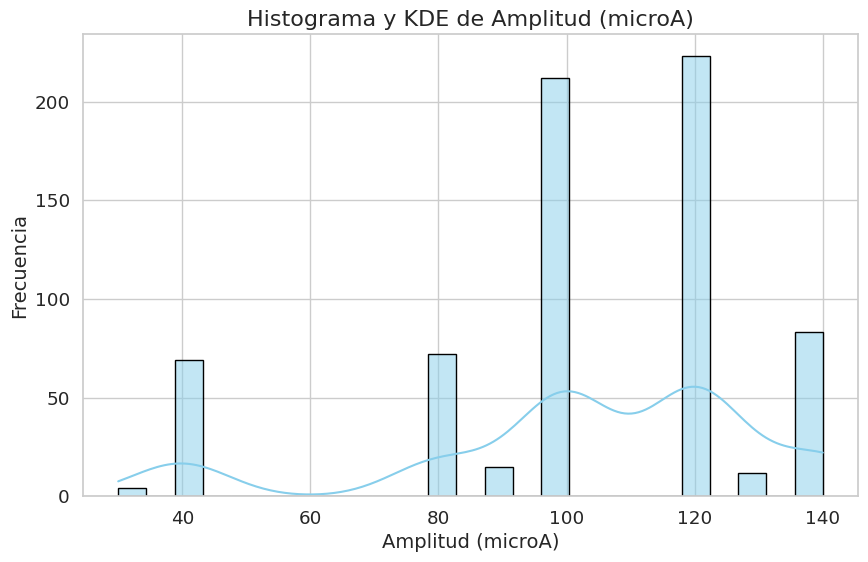

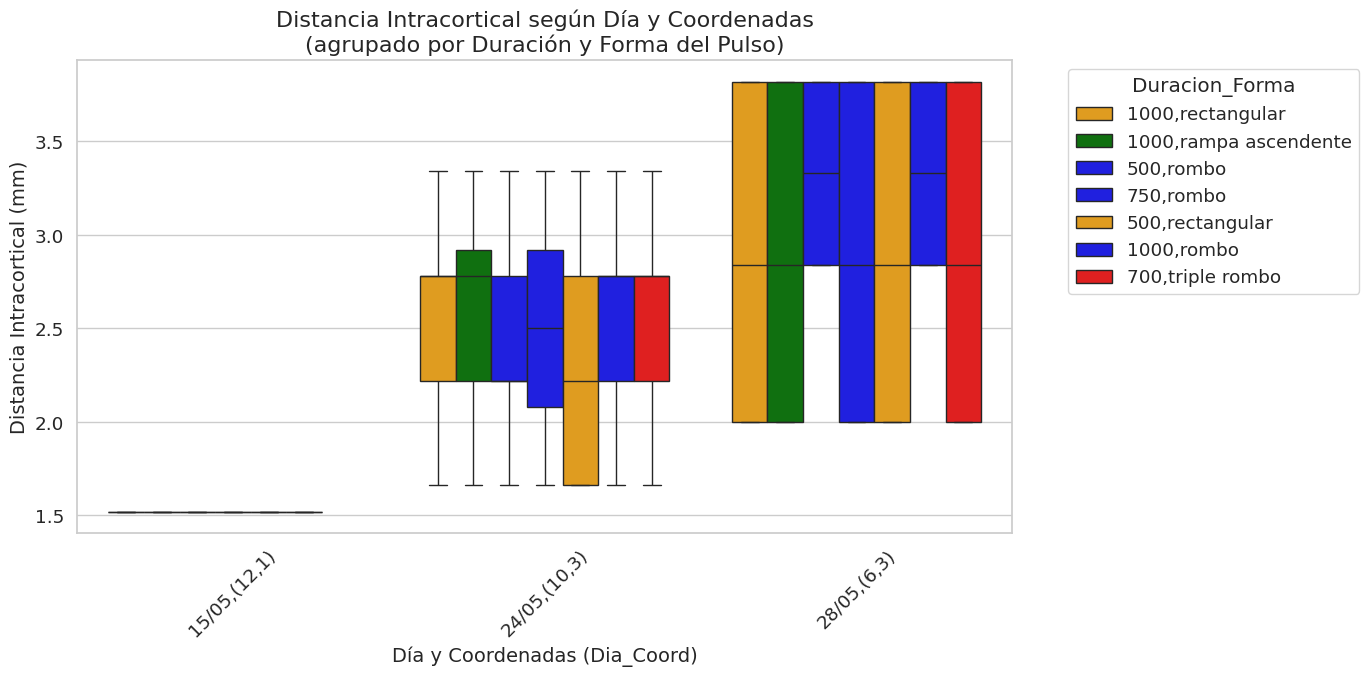

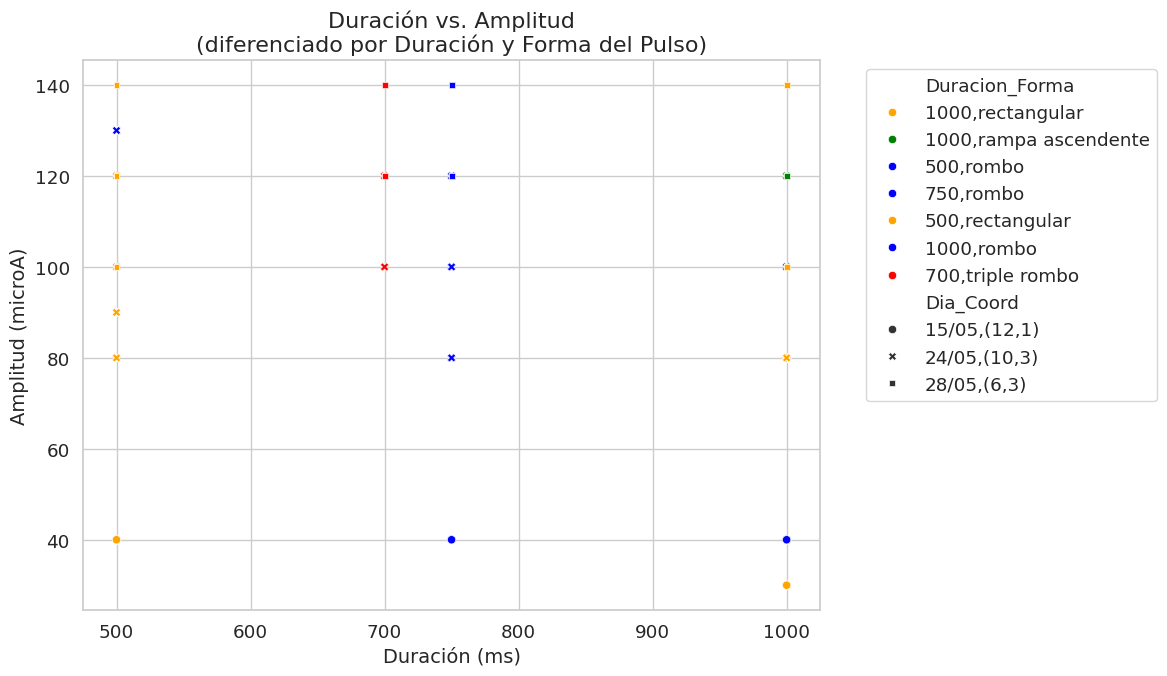

<ipython-input-8-aa4953de008b>:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,


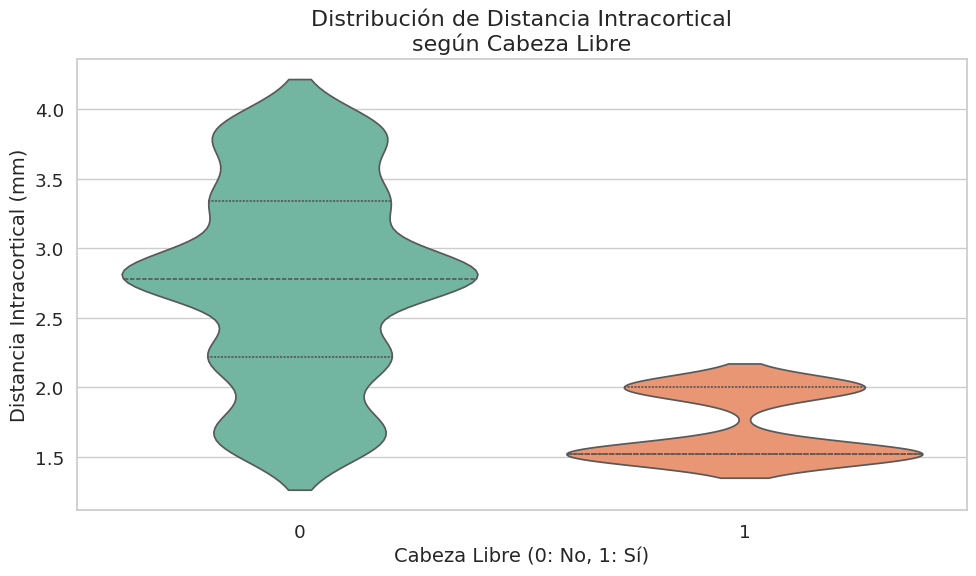

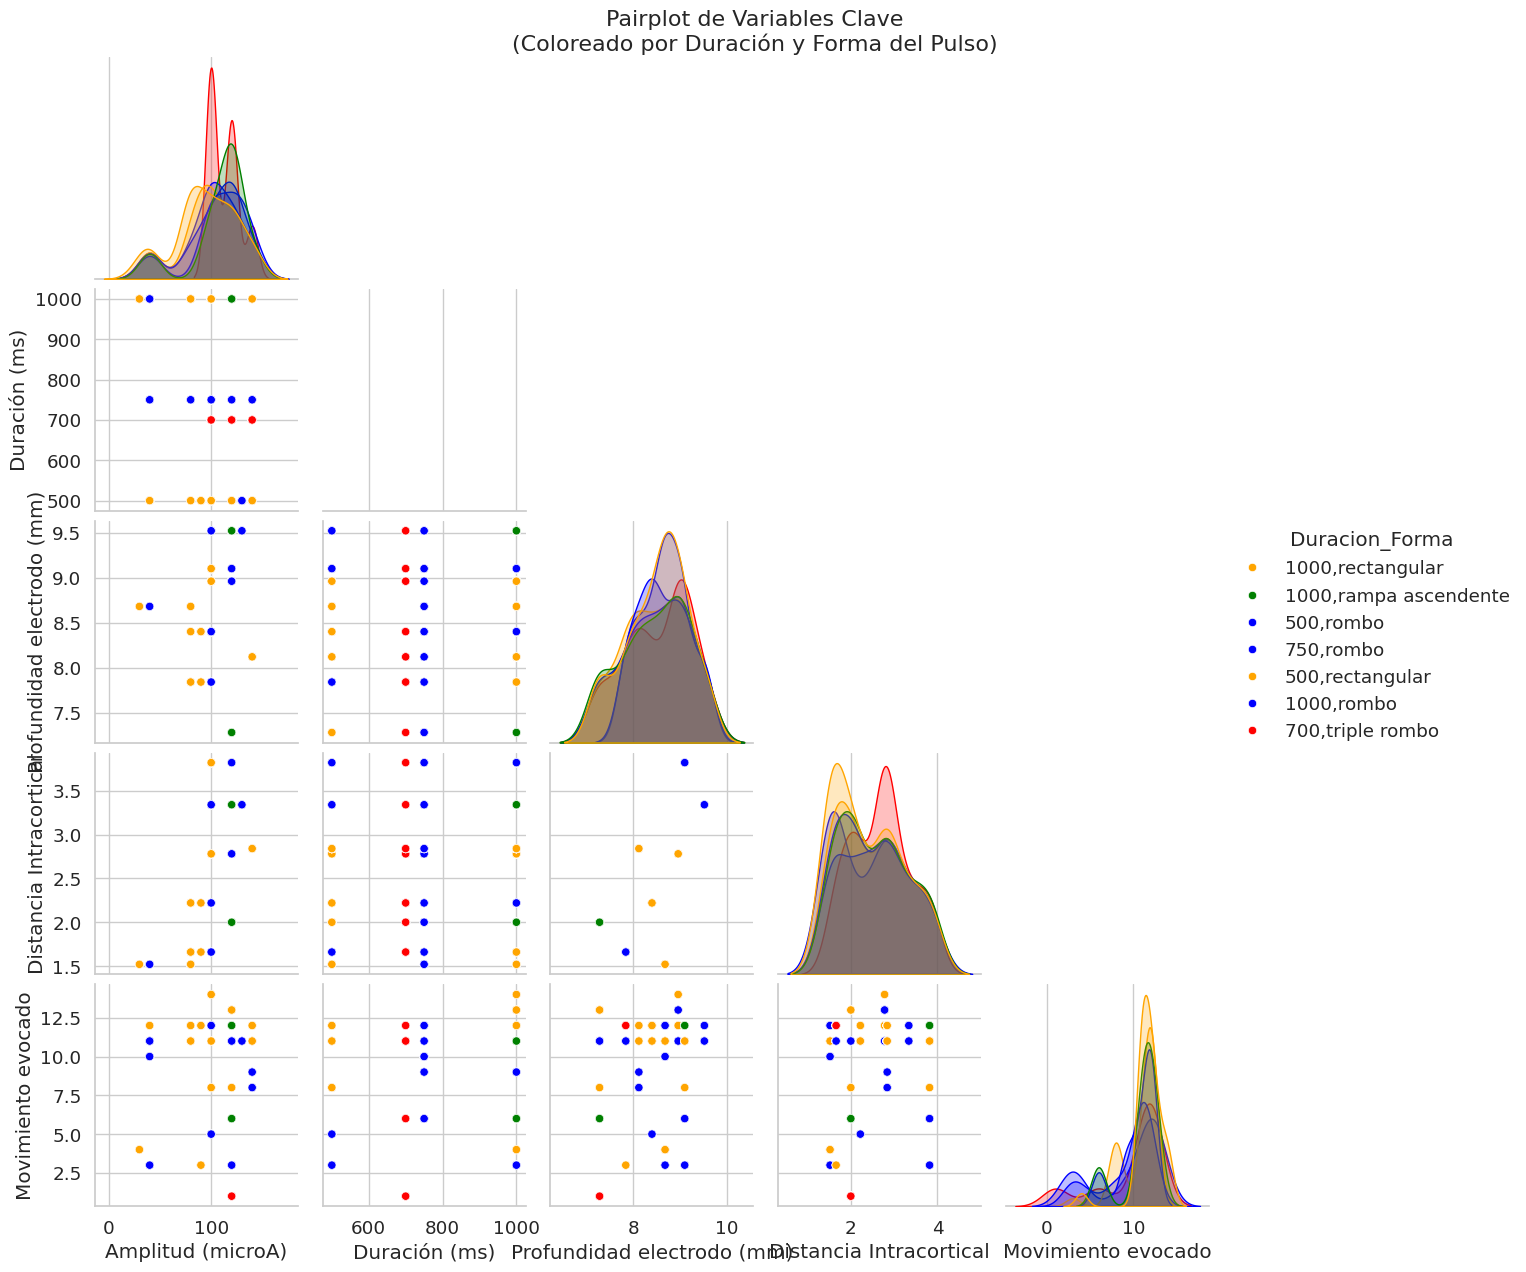


Conteo de registros por Duracion_Forma:
          Duracion_Forma  Cantidad
0  1000,rampa ascendente        98
1       1000,rectangular       113
2             1000,rombo        97
3        500,rectangular       100
4              500,rombo        89
5       700,triple rombo        96
6              750,rombo        97


<ipython-input-8-aa4953de008b>:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_df, x="Duracion_Forma", y="Cantidad", palette=duracion_forma_palette)


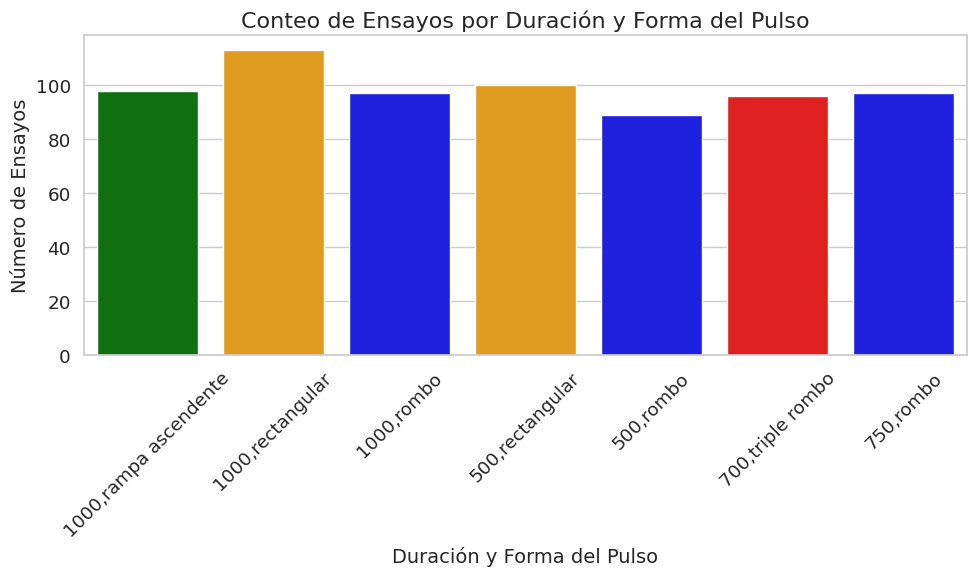


Suma de Ensayos por Duracion_Forma:
          Duracion_Forma  Total_Ensayos
0  1000,rampa ascendente           1214
1       1000,rectangular           1343
2             1000,rombo           1177
3        500,rectangular           1186
4              500,rombo           1039
5       700,triple rombo           1152
6              750,rombo           1177


<ipython-input-8-aa4953de008b>:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=suma_df, x="Duracion_Forma", y="Total_Ensayos", palette=duracion_forma_palette)


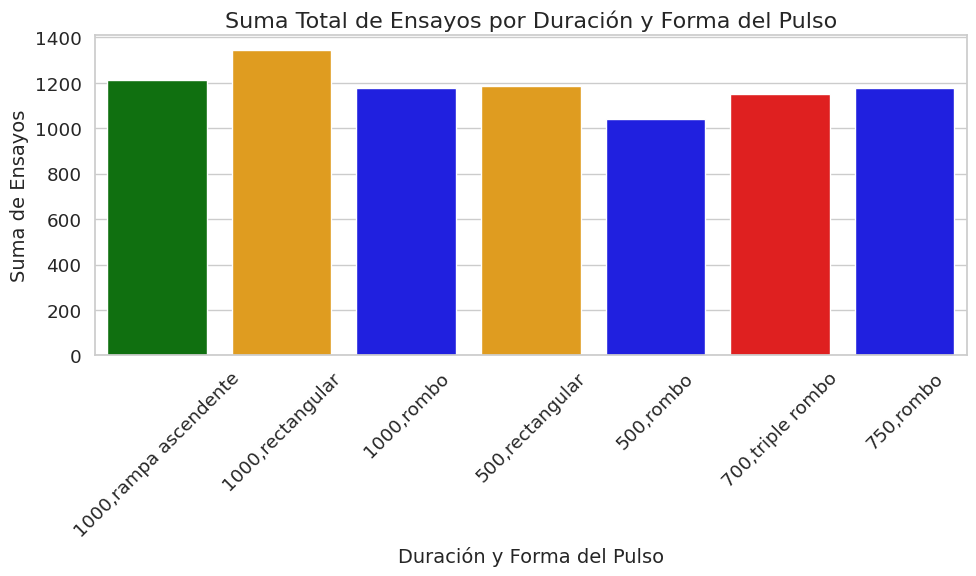


Conteo de registros por coordenada (X_Y) y Duracion_Forma:
   Coord_XY         Duracion_Forma  Cantidad
19    (6,3)              750,rombo        37
17    (6,3)              500,rombo        24
16    (6,3)        500,rectangular        36
15    (6,3)             1000,rombo        24
14    (6,3)       1000,rectangular        37
13    (6,3)  1000,rampa ascendente        39
18    (6,3)       700,triple rombo        36
0    (10,3)  1000,rampa ascendente        48
6    (10,3)              750,rombo        48
5    (10,3)       700,triple rombo        60
4    (10,3)              500,rombo        54
3    (10,3)        500,rectangular        52
2    (10,3)             1000,rombo        49
1    (10,3)       1000,rectangular        50
8    (12,1)       1000,rectangular        26
10   (12,1)        500,rectangular        12
11   (12,1)              500,rombo        11
12   (12,1)              750,rombo        12
7    (12,1)  1000,rampa ascendente        11
9    (12,1)             1000,rombo      

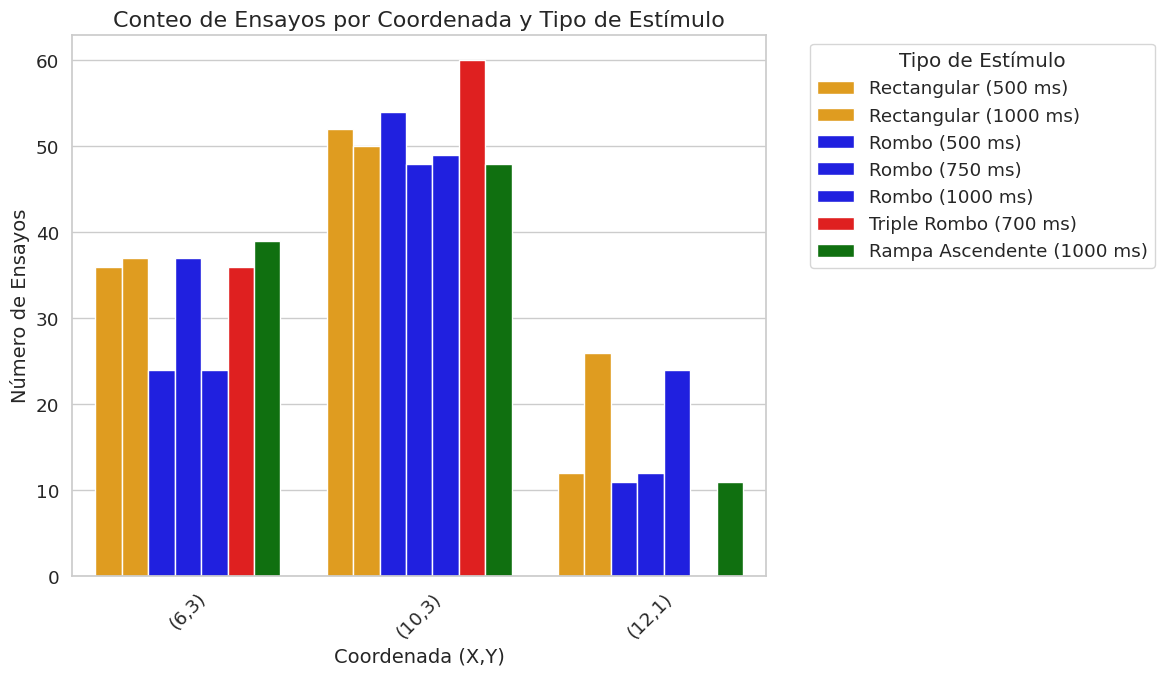

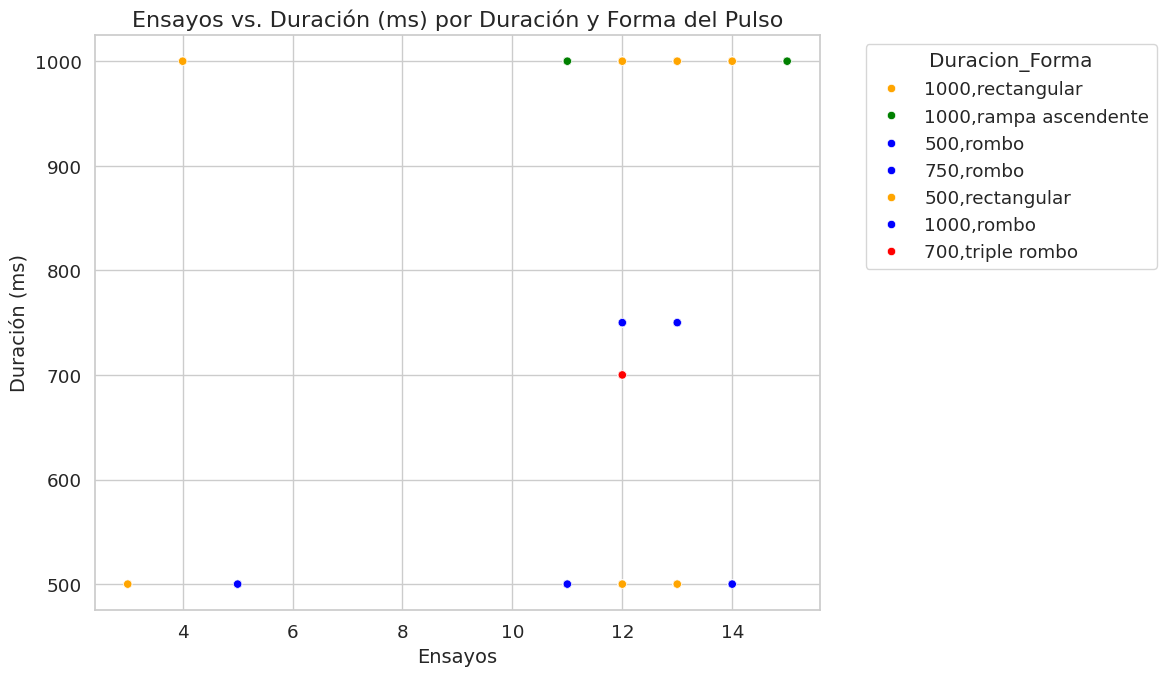

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

# Configuración de estilo para gráficos en español
sns.set_theme(style="whitegrid", font_scale=1.2)

# 1. Cargar el CSV
df = pd.read_csv("Stimuli_information_expanded.csv", delimiter=",", decimal=",")

# 2. Crear columna de fecha-hora combinando "Dia experimental" y "Hora"
df["Datetime"] = pd.to_datetime(df["Dia experimental"] + "/2024 " + df["Hora"],
                                format="%d/%m/%Y %H:%M", errors="coerce")

# 3. Convertir a numérico las columnas de interés
numeric_cols = [
    "Ensayos",
    "Amplitud (microA)",
    "Duración (ms)",
    "Frecuencia (Hz)",
    "Top of the cortex (mm)",
    "Profundidad electrodo (mm)",
    "Movimiento evocado",
    "Start frame (lateral)",
    "Cabeza Libre (0 No, 1 Si)",
    "Coordenada_x",
    "Coordenada_y",
    "Distancia Intratejido",
    "Grueso Meninges",
    "Distancia Intracortical",
    "trial_number"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(" ", "").str.replace(",", "."), errors="coerce")

# 4. Crear columna que une las coordenadas X e Y
df["Coord_XY"] = "(" + df["Coordenada_x"].astype(int).astype(str) + "," + df["Coordenada_y"].astype(int).astype(str) + ")"

# 5. Combinar "Dia experimental" con "Coord_XY" para identificar de forma única día y posición
df["Dia_Coord"] = df["Dia experimental"].astype(str) + "," + df["Coord_XY"]


df["Forma del Pulso"] = df["Forma del Pulso"].astype(str).str.strip().str.lower()
df["Duracion_Forma"] = df["Duración (ms)"].astype(int).astype(str) + "," + df["Forma del Pulso"]

# Diccionario de colores por tipo de forma
PULSE_SHAPE_COLORS = {
    "rectangular": "orange",
    "rombo": "blue",
    "rampa ascendente": "green",
    "triple rombo": "red"
}


# Función para extraer la forma del pulso desde Duracion_Forma
def extract_pulse_shape(duracion_forma):
    return duracion_forma.split(",", 1)[1].strip().lower()

# Mapea el color por forma del pulso (no por combinación completa)
duracion_forma_palette = {
    val: PULSE_SHAPE_COLORS.get(extract_pulse_shape(val), "#808080")
    for val in df["Duracion_Forma"].unique()
}
for dur_forma, color in duracion_forma_palette.items():
    print(f"{dur_forma} → {extract_pulse_shape(dur_forma)} → {color}")

# Orden deseado del hue (leyenda y orden de colores)
orden_duracion_forma = [
    "500,rectangular", "1000,rectangular",
    "500,rombo", "750,rombo", "1000,rombo",
    "1000,rampa ascendente",
    "700,triple rombo"
]

# Opcional: Verifica la asignación
print("\nVerificación de colores asignados:")
for k, v in duracion_forma_palette.items():
    print(f"{k} => {v}")

# Visualización preliminar del DataFrame
print("Primeros registros:")
print(df.head())

# 7. Mostrar valores faltantes en las columnas numéricas
print("\nValores faltantes por columna:")
print(df[numeric_cols].isnull().sum())

# 8. Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas:")
print(df[numeric_cols].describe())

# 9. Pruebas de normalidad (Shapiro-Wilk) para las variables numéricas
print("\nPruebas de normalidad (Shapiro-Wilk):")
for col in numeric_cols:
    datos = df[col].dropna()
    if len(datos) >= 3:
        stat, p = shapiro(datos)
        print(f"{col}: p = {p:.4f}")
    else:
        print(f"{col}: No hay suficientes datos para realizar la prueba.")

# 10. Visualizaciones con Seaborn usando la paleta personalizada para Duracion_Forma

## A. Histograma con KDE de "Amplitud (microA)"
plt.figure(figsize=(10,6))
sns.histplot(df["Amplitud (microA)"].dropna(), kde=True, color="skyblue", edgecolor="black")
plt.title("Histograma y KDE de Amplitud (microA)", fontsize=16)
plt.xlabel("Amplitud (microA)", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.show()

## B. Boxplot de "Distancia Intracortical" agrupado por "Dia_Coord" y "Duracion_Forma"
plt.figure(figsize=(14,7))
sns.boxplot(data=df, x="Dia_Coord", y="Distancia Intracortical", hue="Duracion_Forma", palette=duracion_forma_palette)
plt.title("Distancia Intracortical según Día y Coordenadas\n(agrupado por Duración y Forma del Pulso)", fontsize=16)
plt.xlabel("Día y Coordenadas (Dia_Coord)", fontsize=14)
plt.ylabel("Distancia Intracortical (mm)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Duracion_Forma", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## D. Scatterplot de "Duración (ms)" vs. "Amplitud (microA)" diferenciados por "Duracion_Forma"
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,
                x="Duración (ms)",
                y="Amplitud (microA)",
                hue="Duracion_Forma",
                style="Dia_Coord",
                palette=duracion_forma_palette)
plt.title("Duración vs. Amplitud\n(diferenciado por Duración y Forma del Pulso)", fontsize=16)
plt.xlabel("Duración (ms)", fontsize=14)
plt.ylabel("Amplitud (microA)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## E. Violin plot comparativo de "Distancia Intracortical" según "Cabeza Libre (0 No, 1 Si)"
plt.figure(figsize=(10,6))
sns.violinplot(data=df,
               x="Cabeza Libre (0 No, 1 Si)",
               y="Distancia Intracortical",
               palette="Set2",
               inner="quartile")
plt.title("Distribución de Distancia Intracortical\nsegún Cabeza Libre", fontsize=16)
plt.xlabel("Cabeza Libre (0: No, 1: Sí)", fontsize=14)
plt.ylabel("Distancia Intracortical (mm)", fontsize=14)
plt.tight_layout()
plt.show()

## F. Pairplot de variables clave (Amplitud, Duración, Profundidad del Electrodo, Distancia Intracortical y Movimiento Evocado)
vars_interes = ["Amplitud (microA)", "Duración (ms)", "Profundidad electrodo (mm)",
                "Distancia Intracortical", "Movimiento evocado"]
df_pairplot = df[vars_interes + ["Duracion_Forma"]].dropna()
sns.pairplot(df_pairplot, hue="Duracion_Forma", palette=duracion_forma_palette, diag_kind="kde", corner=True)
plt.suptitle("Pairplot de Variables Clave\n(Coloreado por Duración y Forma del Pulso)", y=1.02, fontsize=16)
plt.show()

# ------------------------------------------------------------------
# 11. Análisis de Conteos y Combinaciones Adicionales
# ------------------------------------------------------------------

## 11.1 Conteo de registros (ensayos) por Duracion_Forma
conteo_df = df.groupby("Duracion_Forma").size().reset_index(name="Cantidad")
print("\nConteo de registros por Duracion_Forma:")
print(conteo_df)

plt.figure(figsize=(10,6))
sns.barplot(data=conteo_df, x="Duracion_Forma", y="Cantidad", palette=duracion_forma_palette)
plt.title("Conteo de Ensayos por Duración y Forma del Pulso", fontsize=16)
plt.xlabel("Duración y Forma del Pulso", fontsize=14)
plt.ylabel("Número de Ensayos", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 11.2 Suma total de Ensayos por Duracion_Forma
# (Si la columna "Ensayos" representa la cantidad de ensayos por registro)
suma_df = df.groupby("Duracion_Forma")["Ensayos"].sum().reset_index(name="Total_Ensayos")
print("\nSuma de Ensayos por Duracion_Forma:")
print(suma_df)

plt.figure(figsize=(10,6))
sns.barplot(data=suma_df, x="Duracion_Forma", y="Total_Ensayos", palette=duracion_forma_palette)
plt.title("Suma Total de Ensayos por Duración y Forma del Pulso", fontsize=16)
plt.xlabel("Duración y Forma del Pulso", fontsize=14)
plt.ylabel("Suma de Ensayos", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Orden deseado del hue (leyenda y orden de colores)
orden_duracion_forma = [
    "500,rectangular", "1000,rectangular",
    "500,rombo", "750,rombo", "1000,rombo",
    "700,triple rombo",
    "1000,rampa ascendente"

]

legend_labels_map = {
    "500,rectangular": "Rectangular (500 ms)",
    "1000,rectangular": "Rectangular (1000 ms)",
    "500,rombo": "Rombo (500 ms)",
    "750,rombo": "Rombo (750 ms)",
    "1000,rombo": "Rombo (1000 ms)",
    "1000,rampa ascendente": "Rampa Ascendente (1000 ms)",
    "700,triple rombo": "Triple Rombo (700 ms)"
}
# 11.3 Conteo de Ensayos por Coordenada y Duracion_Forma
conteo_coord_df = df.groupby(["Coord_XY", "Duracion_Forma"]).size().reset_index(name="Cantidad")

# --- Reordenar las coordenadas manualmente ---
orden_personalizado = ["(6,3)", "(10,3)", "(12,1)"]
conteo_coord_df["Coord_XY"] = pd.Categorical(conteo_coord_df["Coord_XY"], categories=orden_personalizado, ordered=True)
conteo_coord_df = conteo_coord_df.sort_values("Coord_XY")

print("\nConteo de registros por coordenada (X_Y) y Duracion_Forma:")
print(conteo_coord_df)

plt.figure(figsize=(12, 7))
sns.barplot(data=conteo_coord_df,
            x="Coord_XY",
            y="Cantidad",
            hue="Duracion_Forma",
            hue_order=orden_duracion_forma,
            palette=duracion_forma_palette)

plt.title("Conteo de Ensayos por Coordenada y Tipo de Estímulo", fontsize=16)
plt.xlabel("Coordenada (X,Y)", fontsize=14)
plt.ylabel("Número de Ensayos", fontsize=14)
plt.xticks(rotation=45)

# **AQUÍ ESTÁ EL CAMBIO PARA LA LEYENDA:**
# 1. Obtener los "handles" (los elementos visuales de la leyenda) y las "labels" (las etiquetas actuales)
handles, labels = plt.gca().get_legend_handles_labels()
# 2. Crear las nuevas etiquetas usando el diccionario de mapeo
new_labels = [legend_labels_map.get(label, label) for label in labels]
# 3. Reemplazar la leyenda con las nuevas etiquetas
plt.legend(handles, new_labels, title="Tipo de Estímulo", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## 11.4 Scatterplot: Ensayos vs. Duración (ms) diferenciados por Duracion_Forma
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x="Ensayos", y="Duración (ms)", hue="Duracion_Forma", palette=duracion_forma_palette)
plt.title("Ensayos vs. Duración (ms) por Duración y Forma del Pulso", fontsize=16)
plt.xlabel("Ensayos", fontsize=14)
plt.ylabel("Duración (ms)", fontsize=14)
plt.legend(title="Duracion_Forma", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



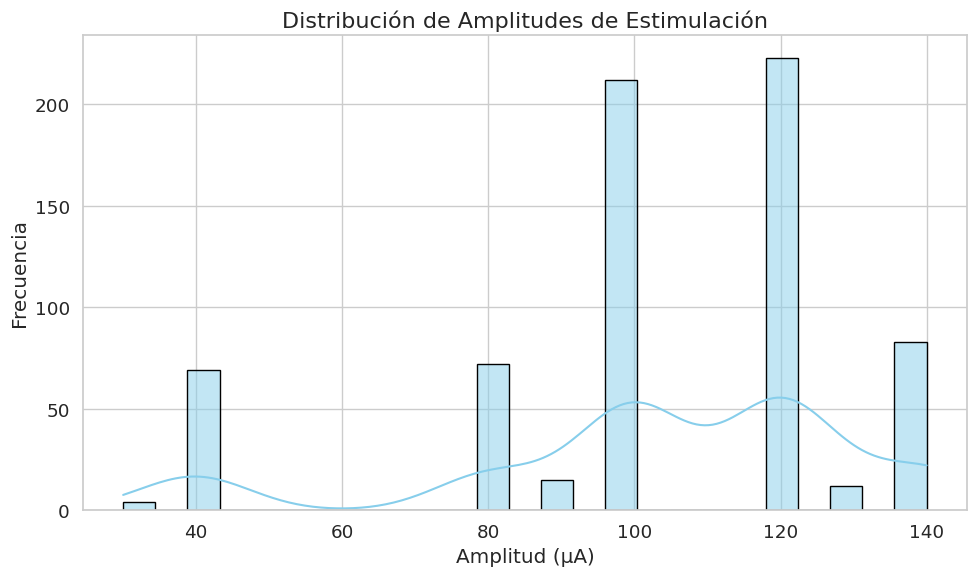

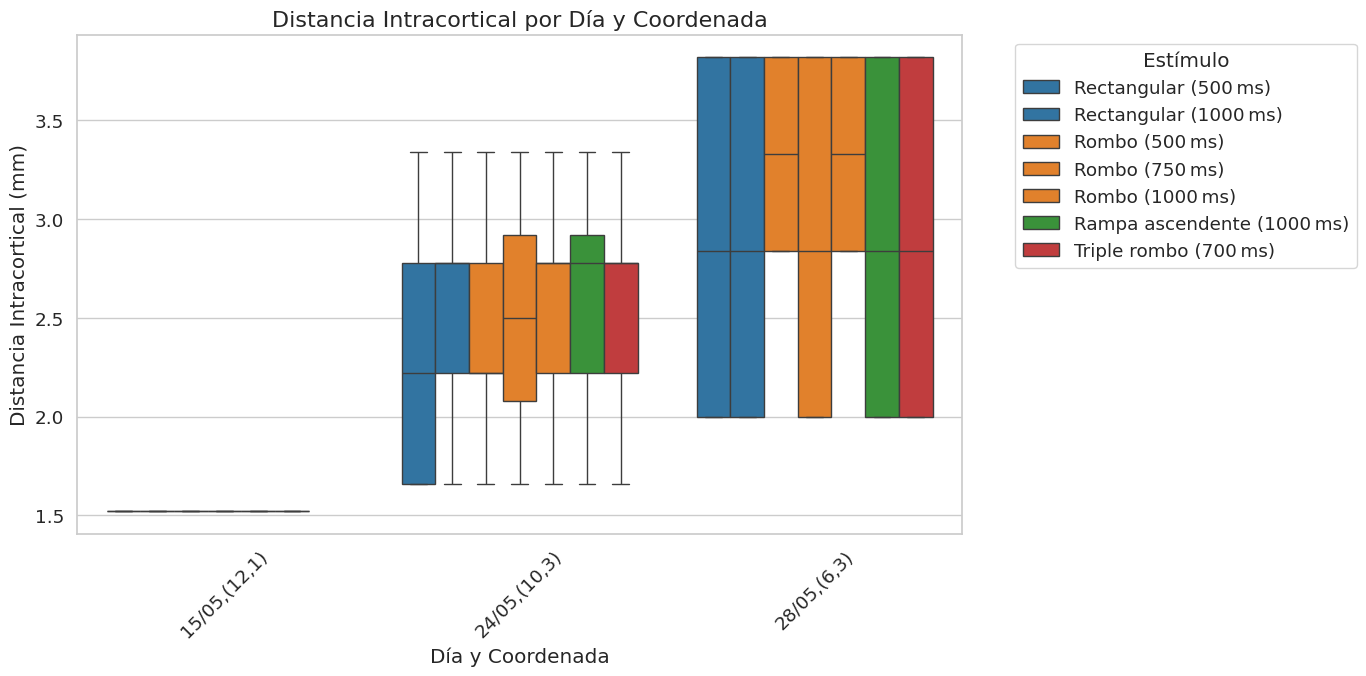

<ipython-input-4-81d4dd7f3028>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Cabeza Libre (0 No, 1 Si)", y="Distancia Intracortical", palette="Set2", inner="quartile")


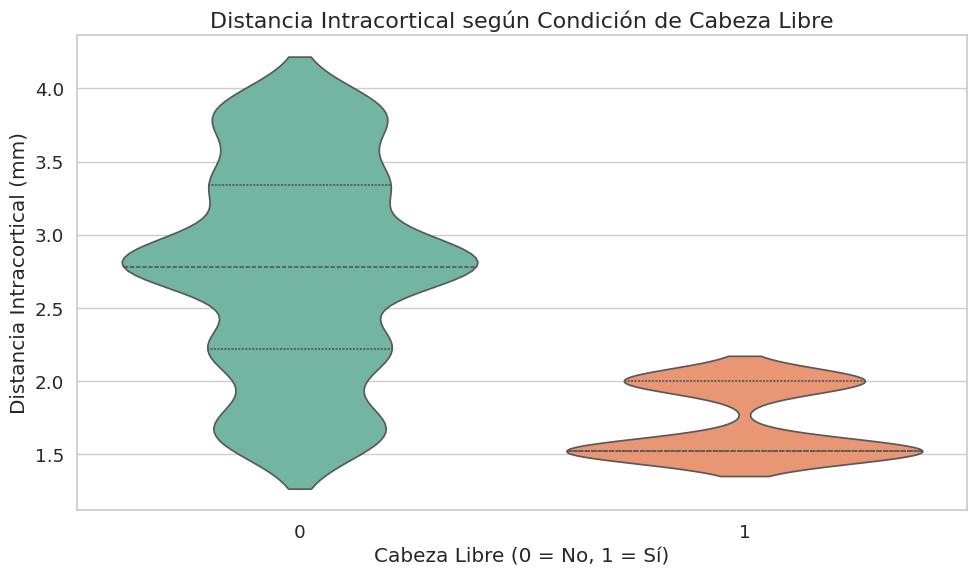

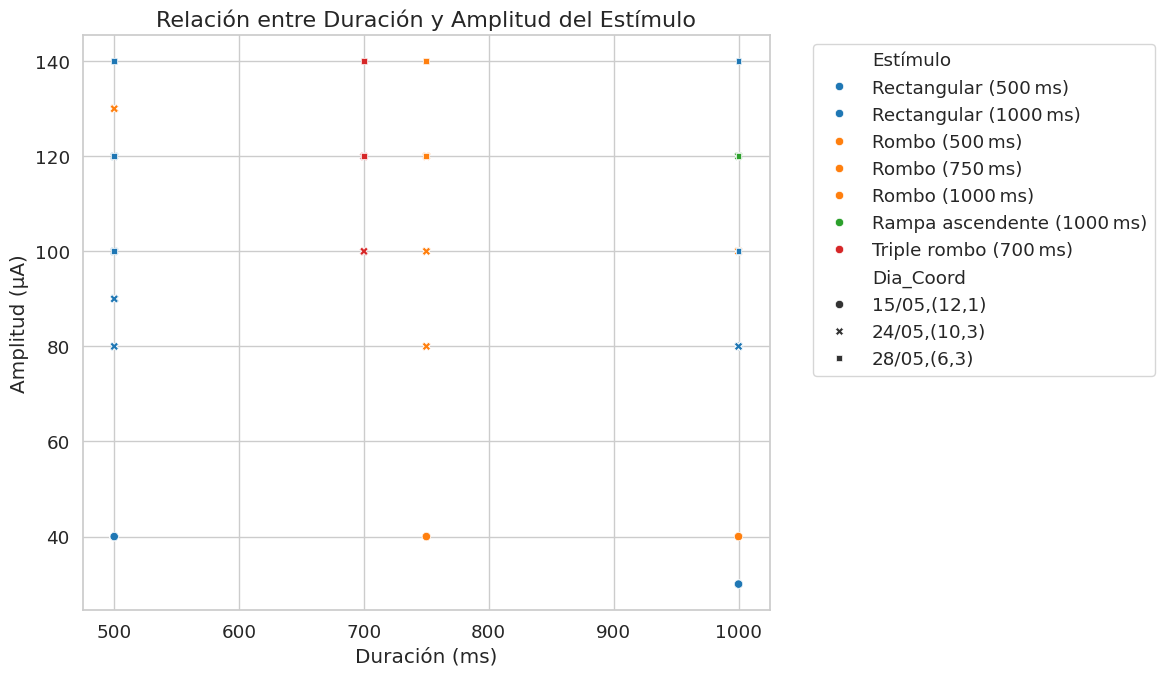

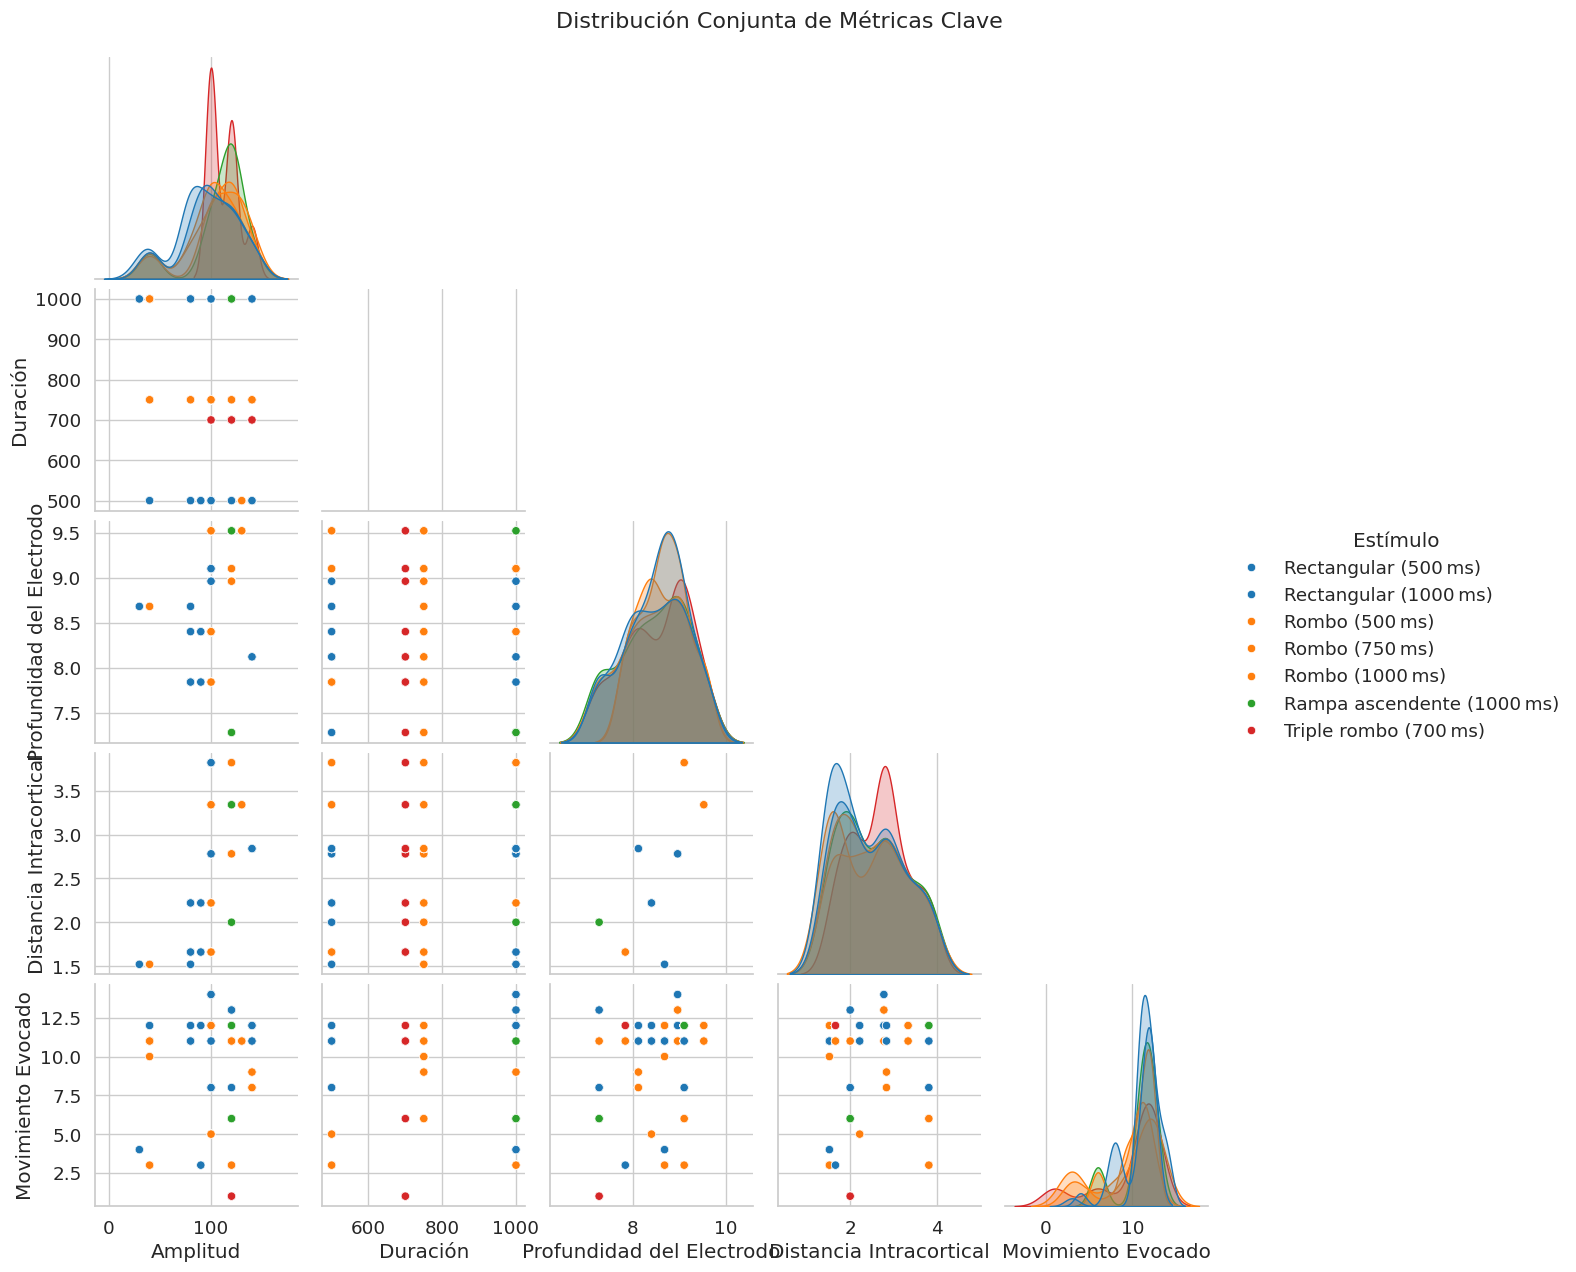

<ipython-input-4-81d4dd7f3028>:111: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_df = df.groupby("Estímulo").size().reset_index(name="Cantidad")
<ipython-input-4-81d4dd7f3028>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_df, x="Estímulo", y="Cantidad", palette=colores_legibles)


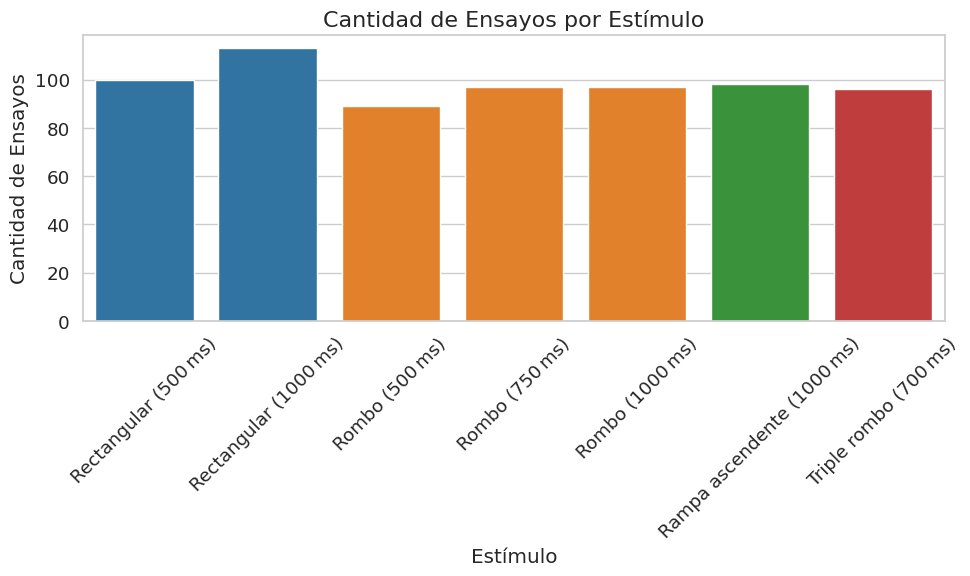

<ipython-input-4-81d4dd7f3028>:122: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  suma_df = df.groupby("Estímulo")["Ensayos"].sum().reset_index(name="Total de Ensayos")
<ipython-input-4-81d4dd7f3028>:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=suma_df, x="Estímulo", y="Total de Ensayos", palette=colores_legibles)


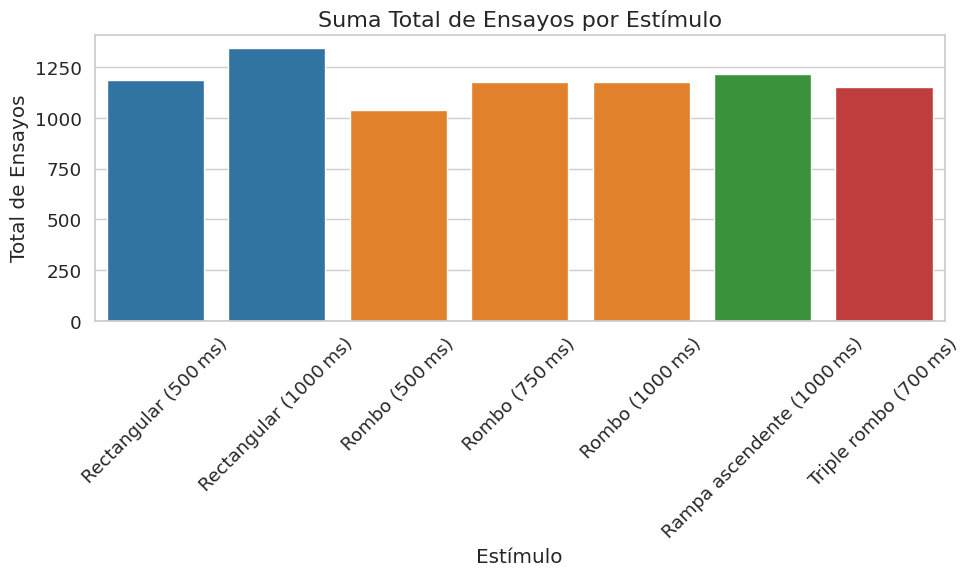

<ipython-input-4-81d4dd7f3028>:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_coord_df = df.groupby(["Coord_XY", "Estímulo"]).size().reset_index(name="Cantidad")


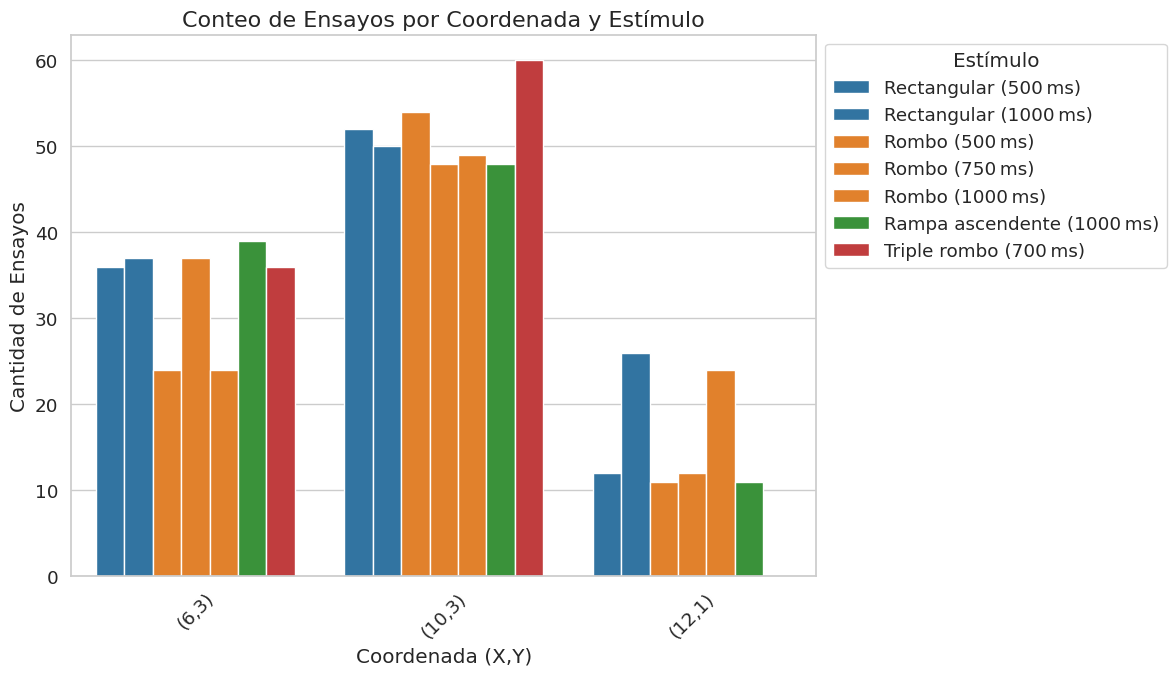

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Estilo gráfico
sns.set_theme(style="whitegrid", font_scale=1.2)

# Cargar CSV
df = pd.read_csv("Stimuli_information_expanded.csv", delimiter=",", decimal=",")

# Fecha-hora
df["Datetime"] = pd.to_datetime(df["Dia experimental"] + "/2024 " + df["Hora"],
                                format="%d/%m/%Y %H:%M", errors="coerce")

# Columnas auxiliares
df["Coord_XY"] = "(" + df["Coordenada_x"].astype(int).astype(str) + "," + df["Coordenada_y"].astype(int).astype(str) + ")"
df["Dia_Coord"] = df["Dia experimental"].astype(str) + "," + df["Coord_XY"]
df["Forma del Pulso"] = df["Forma del Pulso"].astype(str).str.strip().str.lower()
df["Duracion_Forma"] = df["Duración (ms)"].astype(int).astype(str) + "," + df["Forma del Pulso"]

# Establecer orden deseado de estímulos
orden_estimulos = [
    "Rectangular (500 ms)", "Rectangular (1000 ms)",
    "Rombo (500 ms)", "Rombo (750 ms)", "Rombo (1000 ms)",
    "Rampa ascendente (1000 ms)",
    "Triple rombo (700 ms)"
]

# Diccionario de colores legibles
colores_legibles = {
    "Rectangular (500 ms)": sns.color_palette('tab10')[0],
    "Rectangular (1000 ms)": sns.color_palette('tab10')[0],
    "Rombo (500 ms)": sns.color_palette('tab10')[1],
    "Rombo (750 ms)": sns.color_palette('tab10')[1],
    "Rombo (1000 ms)": sns.color_palette('tab10')[1],
    "Rampa ascendente (1000 ms)": sns.color_palette('tab10')[2],
    "Triple rombo (700 ms)": sns.color_palette('tab10')[3],
}

# Renombrar columnas
df.rename(columns={
    "Amplitud (microA)": "Amplitud",
    "Duración (ms)": "Duración",
    "Profundidad electrodo (mm)": "Profundidad del Electrodo",
    "Movimiento evocado": "Movimiento Evocado"
}, inplace=True)

# Crear nueva columna 'Estímulo' con nombres legibles
df["Estímulo"] = df["Duracion_Forma"].replace({
    "500,rectangular": "Rectangular (500 ms)",
    "1000,rectangular": "Rectangular (1000 ms)",
    "500,rombo": "Rombo (500 ms)",
    "750,rombo": "Rombo (750 ms)",
    "1000,rombo": "Rombo (1000 ms)",
    "1000,rampa ascendente": "Rampa ascendente (1000 ms)",
    "700,triple rombo": "Triple rombo (700 ms)"
})

# Aplicar orden de categorías
df["Estímulo"] = pd.Categorical(df["Estímulo"], categories=orden_estimulos, ordered=True)


# 1. Histograma KDE de Amplitud
plt.figure(figsize=(10,6))
sns.histplot(df["Amplitud"].dropna(), kde=True, color="skyblue", edgecolor="black")
plt.title("Distribución de Amplitudes de Estimulación", fontsize=16)
plt.xlabel("Amplitud (µA)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 2. Boxplot de Distancia Intracortical por Día y Coordenada
plt.figure(figsize=(14,7))
sns.boxplot(data=df, x="Dia_Coord", y="Distancia Intracortical", hue="Estímulo", palette=colores_legibles)
plt.title("Distancia Intracortical por Día y Coordenada", fontsize=16)
plt.xlabel("Día y Coordenada")
plt.ylabel("Distancia Intracortical (mm)")
plt.xticks(rotation=45)
plt.legend(title="Estímulo", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 3. Violin plot según Cabeza Libre
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Cabeza Libre (0 No, 1 Si)", y="Distancia Intracortical", palette="Set2", inner="quartile")
plt.title("Distancia Intracortical según Condición de Cabeza Libre", fontsize=16)
plt.xlabel("Cabeza Libre (0 = No, 1 = Sí)")
plt.ylabel("Distancia Intracortical (mm)")
plt.tight_layout()
plt.show()

# 4. Scatterplot Duración vs Amplitud
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x="Duración", y="Amplitud", hue="Estímulo", style="Dia_Coord", palette=colores_legibles)
plt.title("Relación entre Duración y Amplitud del Estímulo", fontsize=16)
plt.xlabel("Duración (ms)")
plt.ylabel("Amplitud (µA)")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 5. Pairplot de métricas cinemáticas clave
vars_interes = ["Amplitud", "Duración", "Profundidad del Electrodo", "Distancia Intracortical", "Movimiento Evocado"]
sns.pairplot(df[vars_interes + ["Estímulo"]].dropna(), hue="Estímulo", palette=colores_legibles, diag_kind="kde", corner=True)
plt.suptitle("Distribución Conjunta de Métricas Clave", y=1.02, fontsize=16)
plt.show()

# 6. Conteo de Ensayos por Estímulo
conteo_df = df.groupby("Estímulo").size().reset_index(name="Cantidad")
plt.figure(figsize=(10,6))
sns.barplot(data=conteo_df, x="Estímulo", y="Cantidad", palette=colores_legibles)
plt.title("Cantidad de Ensayos por Estímulo", fontsize=16)
plt.xlabel("Estímulo")
plt.ylabel("Cantidad de Ensayos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Suma total de Ensayos por Estímulo
suma_df = df.groupby("Estímulo")["Ensayos"].sum().reset_index(name="Total de Ensayos")
plt.figure(figsize=(10,6))
sns.barplot(data=suma_df, x="Estímulo", y="Total de Ensayos", palette=colores_legibles)
plt.title("Suma Total de Ensayos por Estímulo", fontsize=16)
plt.xlabel("Estímulo")
plt.ylabel("Total de Ensayos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Conteo por Coordenada y Estímulo (orden personalizado de coordenadas y estímulos)
conteo_coord_df = df.groupby(["Coord_XY", "Estímulo"]).size().reset_index(name="Cantidad")

# Establecer orden personalizado de coordenadas
orden_coord = ["(6,3)", "(10,3)", "(12,1)"]
conteo_coord_df["Coord_XY"] = pd.Categorical(conteo_coord_df["Coord_XY"], categories=orden_coord, ordered=True)

plt.figure(figsize=(12,7))
sns.barplot(data=conteo_coord_df,
            x="Coord_XY",
            y="Cantidad",
            hue="Estímulo",
            hue_order=orden_estimulos,
            palette=colores_legibles)

plt.title("Conteo de Ensayos por Coordenada y Estímulo", fontsize=16)
plt.xlabel("Coordenada (X,Y)")
plt.ylabel("Cantidad de Ensayos")
plt.xticks(rotation=45)
plt.legend(title="Estímulo", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


